In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast


In [4]:
df = pd.read_csv('steam_games.csv')
df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.49,http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,False,773640.0,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.24,http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,733530.0,Sacada,NaN,NaN
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.39,http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660.0,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870.0,"xropi,stev3ns",1 user reviews,NaN


In [ ]:
Ver valores NaN en todas las columnas y hacer limpieza al respecto

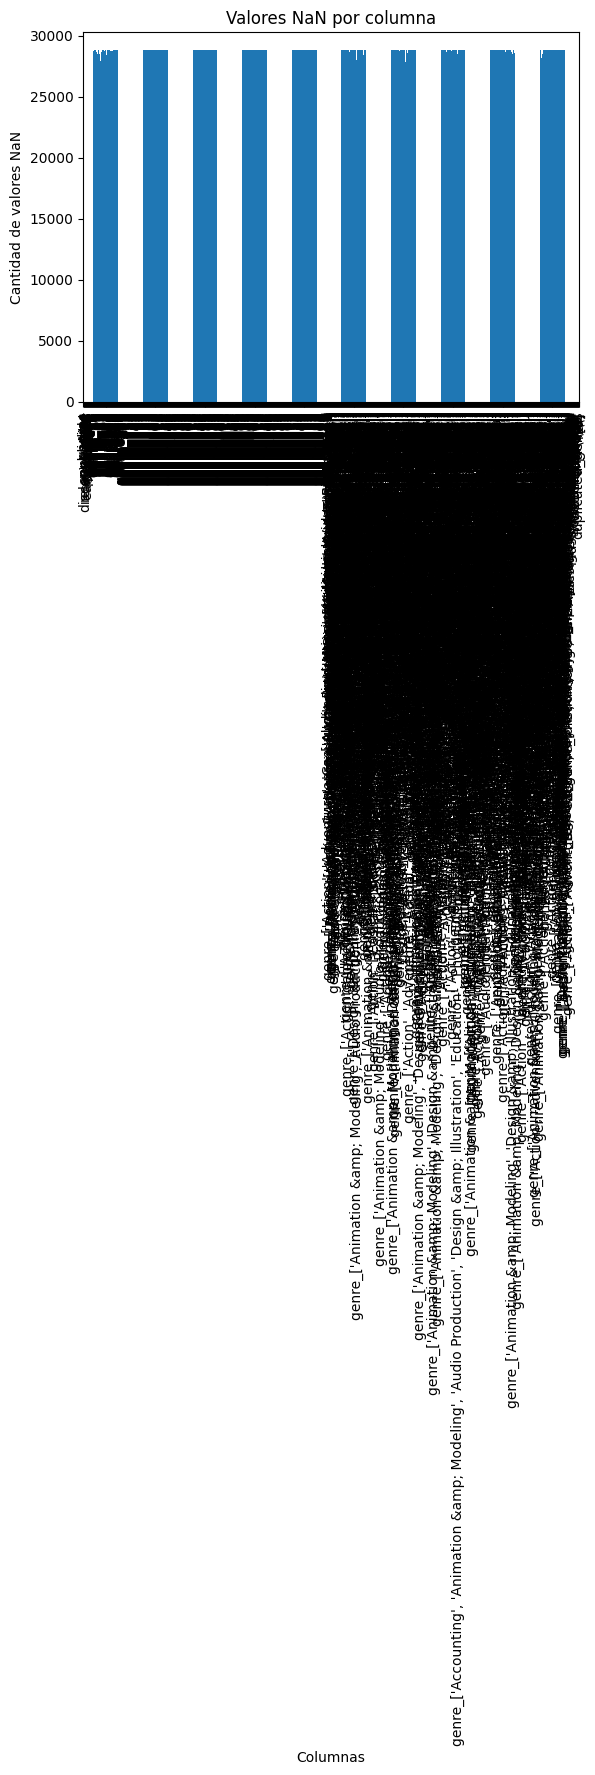

In [115]:
nan = df.isna().sum()
nan.plot(kind='bar')
plt.title('Valores NaN por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores NaN')
plt.show()

In [11]:
df['genres'].fillna('Unknown', inplace=True)
df['specs'].fillna('Unknown', inplace=True)
df['sentiment'].fillna('Unknown', inplace=True)
df['publisher'].fillna('Unknown', inplace=True)
df['genres'].fillna('Unknown', inplace=True)
df['app_name'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['url'].fillna('Unknown', inplace=True)
df['tags'].fillna('Unknown', inplace=True)
df['reviews_url'].fillna('Unknown', inplace=True)
df['developer'].fillna('Unknown', inplace=True)

In [12]:
df.genres.isna().sum()
df.specs.isna().sum()
df.sentiment.isna().sum()
df.publisher.isna().sum()
df.developer.isna().sum()

0

In [6]:
df['discount_price'].dtype
df['discount_price'].fillna(0, inplace=True)

dtype('float64')

In [14]:
df['price'].dtype

dtype('O')

In [16]:
df['metascore'].dtype
df['discount_price'].fillna(0, inplace=True)

dtype('float64')

In [ ]:
Convertir la columna price a tipo Float, los valores "Free to play" dejarlos en 0 antes para no perderlos.

In [23]:
df['price'].replace("Free to play", 0, inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtype

dtype('float64')

In [ ]:
Outliers

In [ ]:
Ver outliers del precio

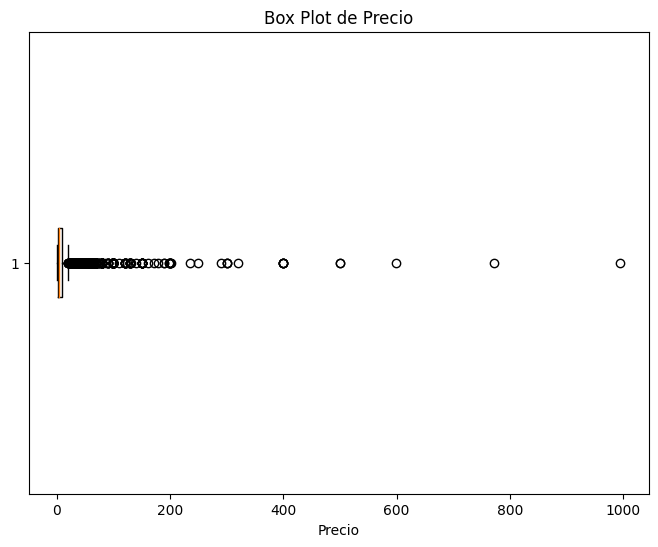

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title("Box Plot de Precio")
plt.xlabel("Precio")
plt.show()

In [ ]:
Correlación early access con price. Asumiendo que 0.0 son los que no cuentan con early acces y 1.0 los que sí.

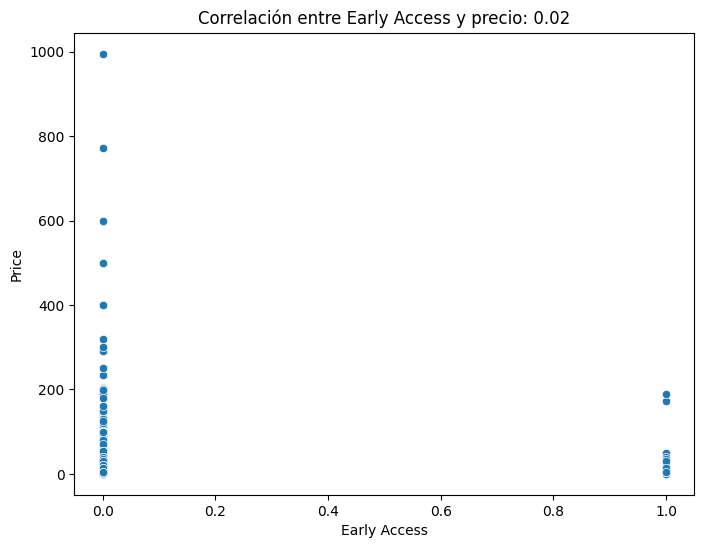

In [42]:
correlation = df['early_access'].corr(df['price'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='early_access', y='price', data=df)
plt.title(f'Correlación entre Early Access y precio: {correlation:.2f}')
plt.xlabel('Early Access')
plt.ylabel('Price')
plt.show()

In [ ]:
Correlación Metascore y Precio

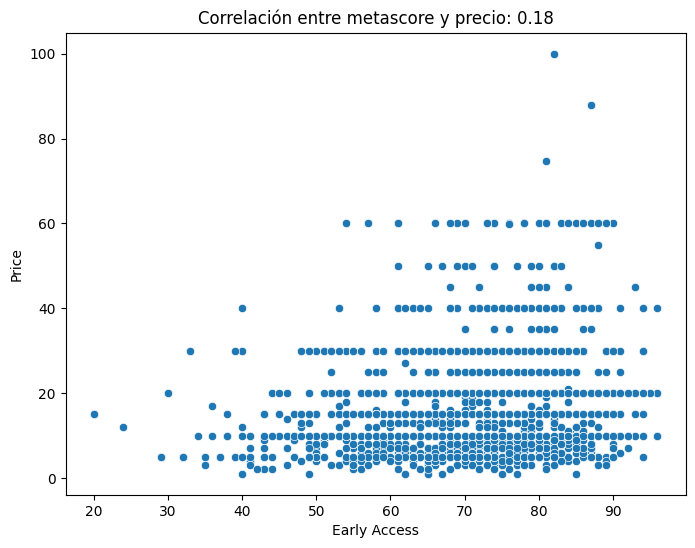

In [43]:
correlation = df['metascore'].corr(df['price'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='metascore', y='price', data=df)
plt.title(f'Correlación entre metascore y precio: {correlation:.2f}')
plt.xlabel('Early Access')
plt.ylabel('Price')
plt.show()

In [ ]:
Correlación entre géneros (encoded) y precio. La mayoria tienen correlación negativa.

In [107]:
df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,...,'Video Production','Web Publishing',Unknown,nan,'',"""''""","['""\'\'""']",[\\],duplicated_genres,nan
0,3459,nan,13770,13025,28341,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],...,0,0,0,1,1,1,1,1,NaN,1
3,7374,nan,28776,27191,28507,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],...,0,0,0,1,1,1,1,1,NaN,1
4,6541,nan,13653,25220,28600,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",...,0,0,1,1,1,1,1,1,NaN,1
5,6439,nan,2255,2132,28591,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",...,0,0,0,1,1,1,1,1,NaN,1
6,6541,nan,20712,19651,28607,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",0.00,http://steamcommunity.com/app/774276/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",...,0,0,0,1,1,1,1,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,2587,nan,4474,4204,28601,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.49,http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",...,0,0,0,1,1,1,1,1,NaN,1
32131,5407,nan,13196,12483,27505,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.24,http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,1,1,1,1,1,NaN,1
32132,3543,nan,20611,19551,22074,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.39,http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,1,1,1,1,1,NaN,1
32133,5367,nan,7011,6588,24340,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",0.00,http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,1,1,1,1,1,NaN,1


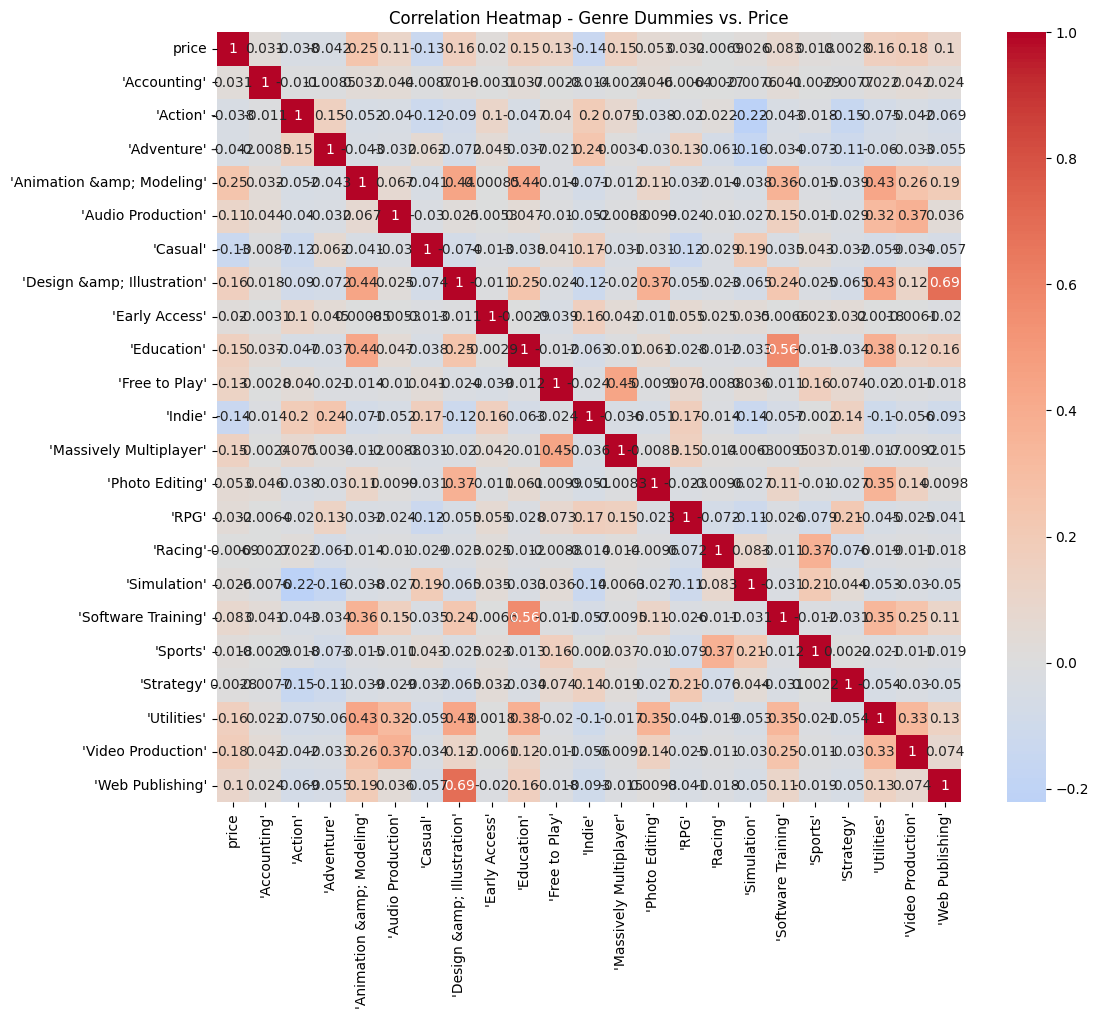

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,...,'RPG','Racing','Simulation','Software Training','Sports','Strategy','Utilities','Video Production','Web Publishing',Unknown
0,3459,nan,13770,13025,28341,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],...,0,0,1,0,0,1,0,0,0,0
3,7374,nan,28776,27191,28507,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],...,0,0,0,0,0,0,0,0,0,0
4,6541,nan,13653,25220,28600,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",...,0,0,0,0,0,0,0,0,0,1
5,6439,nan,2255,2132,28591,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",...,0,0,1,0,0,0,0,0,0,0
6,6541,nan,20712,19651,28607,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",0.00,http://steamcommunity.com/app/774276/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,2587,nan,4474,4204,28601,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.49,http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",...,0,0,1,0,0,1,0,0,0,0
32131,5407,nan,13196,12483,27505,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.24,http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,0,0,1,0,0,0,0
32132,3543,nan,20611,19551,22074,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.39,http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,1,1,0,0,0,0,0,0,0
32133,5367,nan,7011,6588,24340,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",0.00,http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",...,0,0,0,0,0,0,0,0,0,0


In [96]:
correlation_matrix = df[['price'] + genre_dummies.columns.tolist()].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Genre Dummies vs. Price')
plt.show()

In [ ]:
Elimino la columna "Unknown", para ver el desempeño del resto, ya que el mejor desempeño es el de "Unkown"

In [95]:
genre_dummies

,'Accounting','Action','Adventure','Animation &amp; Modeling','Audio Production','Casual','Design &amp; Illustration','Early Access','Education','Free to Play',...,'Photo Editing','RPG','Racing','Simulation','Software Training','Sports','Strategy','Utilities','Video Production','Web Publishing'
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32131,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32132,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
32133,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


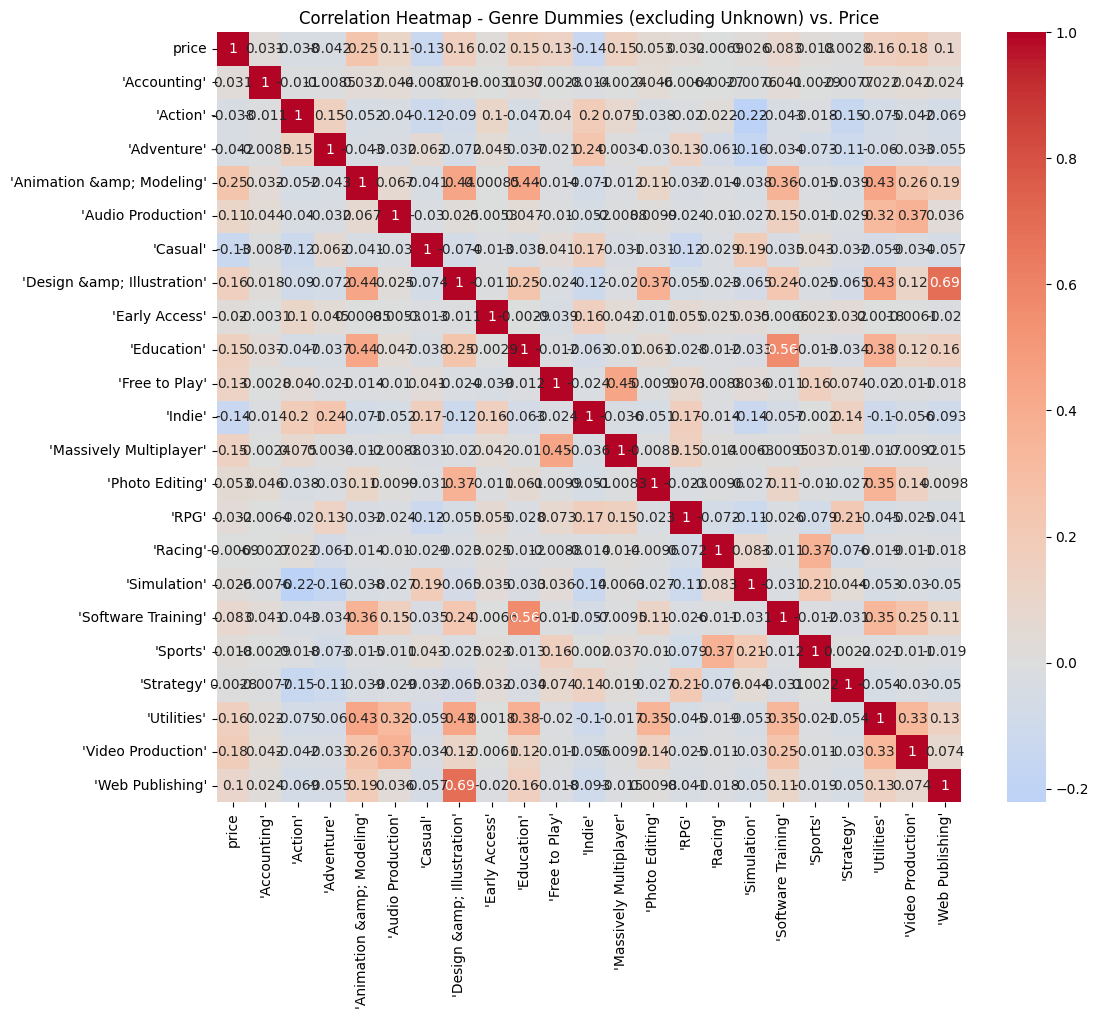

In [92]:
correlation_matrix = df[['price'] + genre_dummies.columns.tolist()].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Genre Dummies (excluding Unknown) vs. Price')
plt.show()